In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 물고기 종류별 몸길이 데이터

df = pd.read_csv('4_fm2.csv')
df

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


<AxesSubplot:xlabel='length', ylabel='Count'>

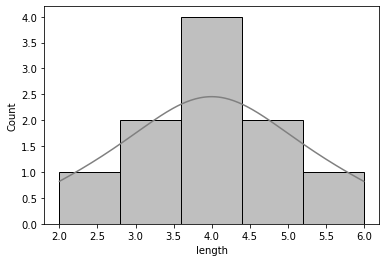

In [3]:
# 종류별 몸길이 데이터 추출

length_A = df.query('species == "A"')['length']
length_B = df.query('species == "B"')['length']
sns.histplot(length_A, color = 'gray', kde = True)

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

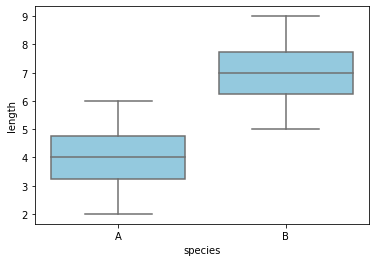

In [4]:
sns.boxplot(x = 'species', y = 'length', data = df, color = 'skyblue')
df.groupby('species').describe()

<AxesSubplot:xlabel='species', ylabel='length'>

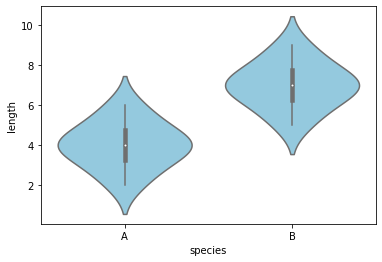

In [5]:
# 바이올린 플롯 (가로폭은 분포를 나타낸다)

sns.violinplot(x = 'species', y = 'length', data = df, color = 'skyblue')
# sns.boxplot(x = 'species', y = 'length', data = df, color = 'skyblue')

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

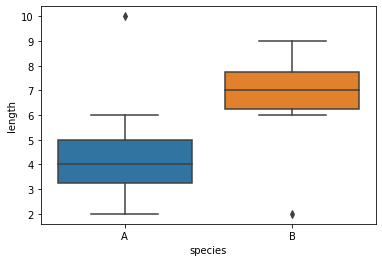

In [6]:
df1 = df.copy()
df1.iloc[5, 1] = 10
df1.iloc[10, 1] = 2

sns.boxplot(x = df1.species, y = df1.length)
df.groupby('species').describe()
# sns.violinplot(x = df1.species, y = df1.length)

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


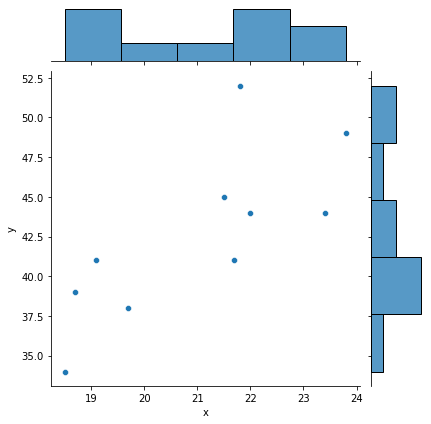

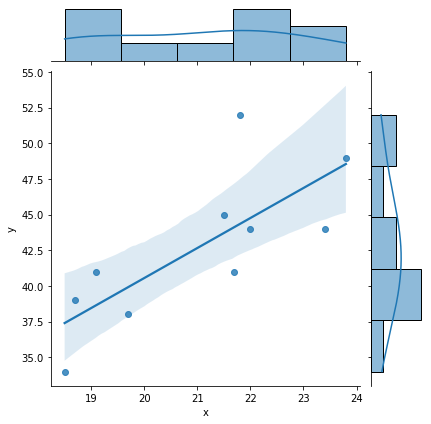

In [7]:
# 조인트플롯 (scatter, hist를 합친 플롯)
# reg : 회귀선

cov_df = pd.read_csv('4_cov.csv')
display(cov_df)
sns.jointplot(cov_df.x, cov_df.y)
sns.jointplot(cov_df.x, cov_df.y, kind = 'reg')

In [8]:
df_auto = pd.read_excel('auto-mpg.xlsx')
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


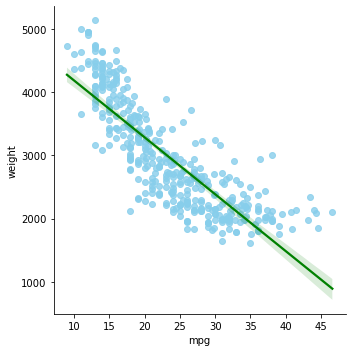

In [9]:
sns.lmplot(x = 'mpg', y = 'weight', data = df_auto, scatter_kws = {'color' : 'skyblue'}, line_kws = {'color' : 'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

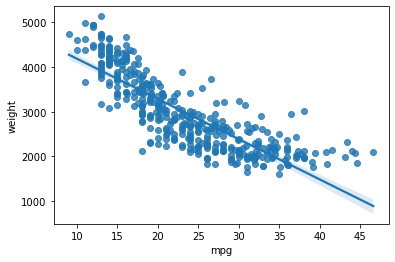

In [10]:
sns.regplot(x = 'mpg', y = 'weight', data = df_auto, fit_reg = True) #lmplot과 같다

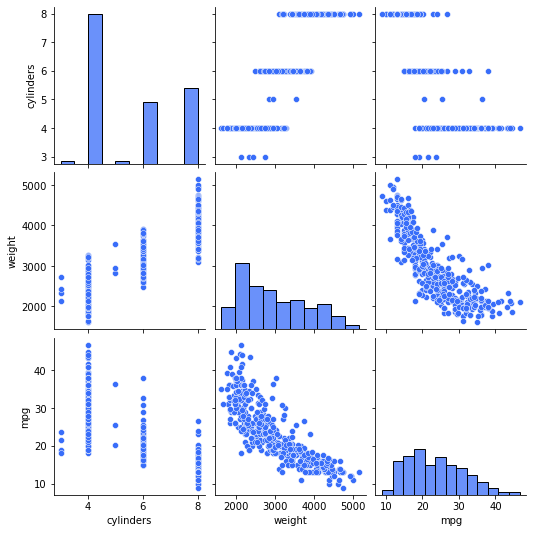

In [11]:
sns.set_palette('rainbow')
sns.pairplot(df_auto[['cylinders', 'weight', 'mpg']])

seabron 팔레트 : https://seaborn.pydata.org/tutorial/color_palettes.html

<AxesSubplot:title={'center':'히트맵 오브 더 데이터셋'}>

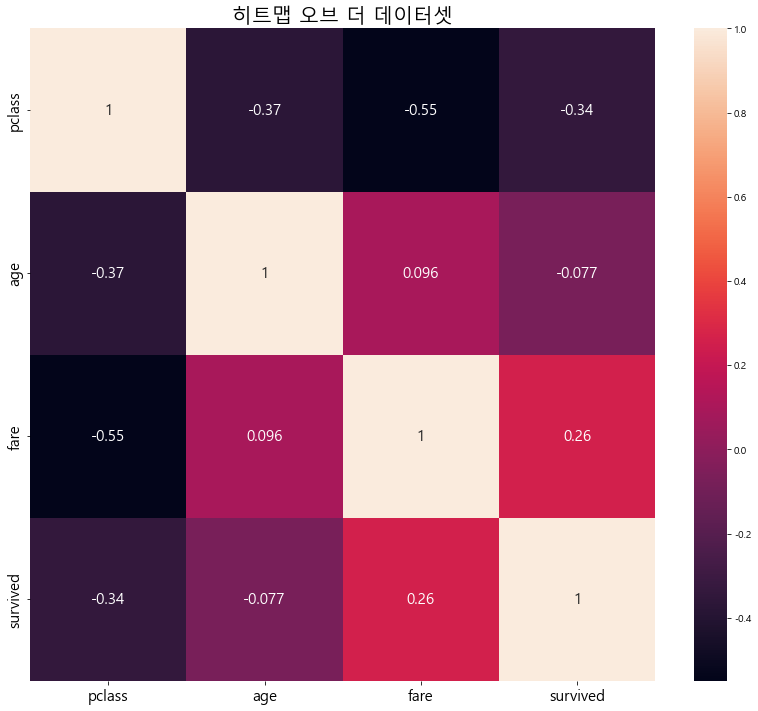

In [24]:
tdf = sns.load_dataset('titanic')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (14, 12))
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('히트맵 오브 더 데이터셋', fontsize = 20)
sns.heatmap(tdf[['pclass', 'age', 'fare', 'survived']].corr(), annot_kws = {'size' : 15}, annot = True)

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

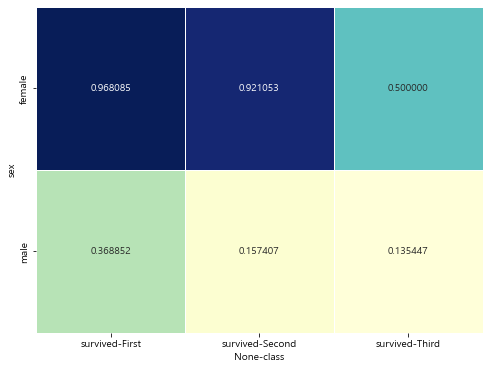

In [26]:
table = tdf.pivot_table(index = ['sex'], columns = ['class'], values = ['survived'], aggfunc = 'mean')
display(table)

plt.figure(figsize = (8, 6))
sns.heatmap(table, annot = True, fmt = 'f', cmap = 'YlGnBu', linewidth = .5, cbar = False)